# Collecting the data from Google Trends
<p><font size='3', color="gray">author: Carina Blüm</font><br></p>
<p style="font-size:12pt">In this notebook the data from Google Trends is gathered for all professional male soccer players from the World Cup in 2014 in a timescale of one month. First, the panda package had to be installed in order to work with the gathered data later on.</p>

In [2]:
#pip install pandas
import pandas as pd
import pylab as pl
import numpy as np
import re

#!pip install --upgrade pytrends
from pytrends.request import TrendReq

import time

import csv

## Step 1: Google Trends data for all male players as a .csv-file
<p style="font-size:12pt">In the first step the created file "wc_2014.csv" has to be read. For each player name, the Google Trends search results for one month (30 days) are gatherd via the unofficial Google Trends API 'pytrend'. To normalize the values, each name is compared with a reference word (corresponding nation and 'soccer'). The results are written in a .csv-file.<br></p>    

In [277]:
dfMale_Player = pd.read_csv("wc_2014.csv", sep=';')
MalePlayer = ['Name']
dfMale_Player[MalePlayer]#.to_csv('malePlayers.csv')

pytrend = TrendReq()

f = open('malePlayer_Google_Trends.csv','w')
f.write('date,Name,Reference,isPartial\n')
f.close()

for i in range(0,736):
    kw_list = [dfMale_Player['Name'][i],dfMale_Player['Nation'][i]+" football"]
    pytrend.build_payload(kw_list, timeframe='today 1-m', geo='', gprop='')
    time.sleep(1.5)

# Interest Over Time
    pytrend.interest_over_time().to_csv('malePlayer_Google_Trends.csv',mode='a')

## Step 2: Sum of Google Trends data for each male soccer player as .csv-file
<p style="font-size:12pt">Afterwards, the results have to be summed up which is realized through the following code.<br></p> 

In [66]:
dfMale_Google = pd.read_csv("malePlayer_Google_Trends.csv")

numberOfPlayers = 736

f = open('Sum_Male_GoogleTrend.csv','w', encoding = 'utf8')
f.write('Name;Sum GoogleTrends\n')

for i in range(0,30*numberOfPlayers,30):
    sum = 0
    for j in range(i+1,i+28):
        x = int(dfMale_Google.iloc[j,1])
        sum += x
    f.write(str(dfMale_Google.iloc[i,1]) + str(';') + str(sum) + '\n')
f.close()

<p>
<br></p> 

<p style="font-size:12pt">The Google Trends results were ordered for the upcoming analysis of the data displayed as plots and boxplots.<br></p> 

In [3]:
df1 = pd.read_csv("Sum_Male_GoogleTrend.csv", sep=';')
columns =['Name', 'Sum GoogleTrends']
df1[columns].sort_values(by='Sum GoogleTrends', ascending=[False])

,Name,Sum GoogleTrends
8,Fred,2283
0,Jefferson,2231
21,Victor,2165
10,Oscar,2040
6,Hulk,1915
19,Bernard,1842
171,Pedro,1742
239,Gervinho,1708
148,Arjen Robben,1602
626,John Brooks,1581


<p>
<br></p> 

<p style="font-size:12pt">Also the number of caps have been ordered descendant for the analysis of the data.<br></p> 

In [4]:
df1 = pd.read_csv("wc_2014.csv", sep=';')
columns =['Name', 'Matches']
df1[columns].sort_values(by='Matches', ascending=[False])

,Name,Matches
161,Iker Casillas,154
259,Yasuhito Endō,144
322,Gianluigi Buffon,140
511,Javad Nekounam,140
216,Giorgos Karagounis,135
562,Miroslav Klose,132
168,Xavi,132
71,Carlos Salcido,122
431,Noel Valladares,122
72,Rafael Márquez,120


<br>
## Step 3: Generate plots
### 3.1 Male soccer player (Google Trends data compared with number of international caps)
<p style="font-size:12pt">The following code creates a plot of the male soccer players with the aid of matplotlib which is a plotting library from python. The number of international caps is displayed on the x-axis, the values from the Google Trends requests on the y-axis.<br></p>

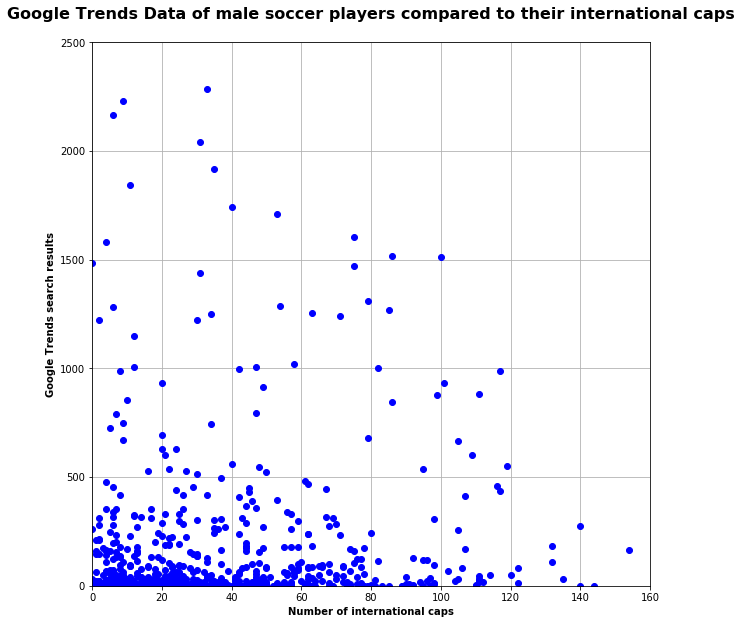

In [152]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import pandas as pd


df1 = pd.read_csv("wc_2014.csv", sep=';')
columns =['Matches']

df2 = pd.read_csv("Sum_Male_GoogleTrend.csv", sep=';')
columns2 = ['Sum GoogleTrends']
# x axis
x = df1[columns]  #.sort_values(by='Matches')
# y axis
y = df2[columns2]
#print(x,y)
plt.figure(figsize=(10,10))
plt.plot(x, y, 'bo')
plt.xlabel('Number of international caps', fontweight='bold')
plt.ylabel('Google Trends search results', fontweight='bold')
plt.title('Google Trends Data of male soccer players compared to their international caps' + '\n', fontsize=16, fontweight='bold')
plt.axis([0, 160, 0, 2500])
plt.grid(True)
plt.show()

<br></p>
### 3.2 Female and male soccer player (Google Trends data compared with number of international caps)
<p style="font-size:12pt">The following code creates a combined plot of the Google Trends data and the international caps from female and male soccer players.<br></p> 

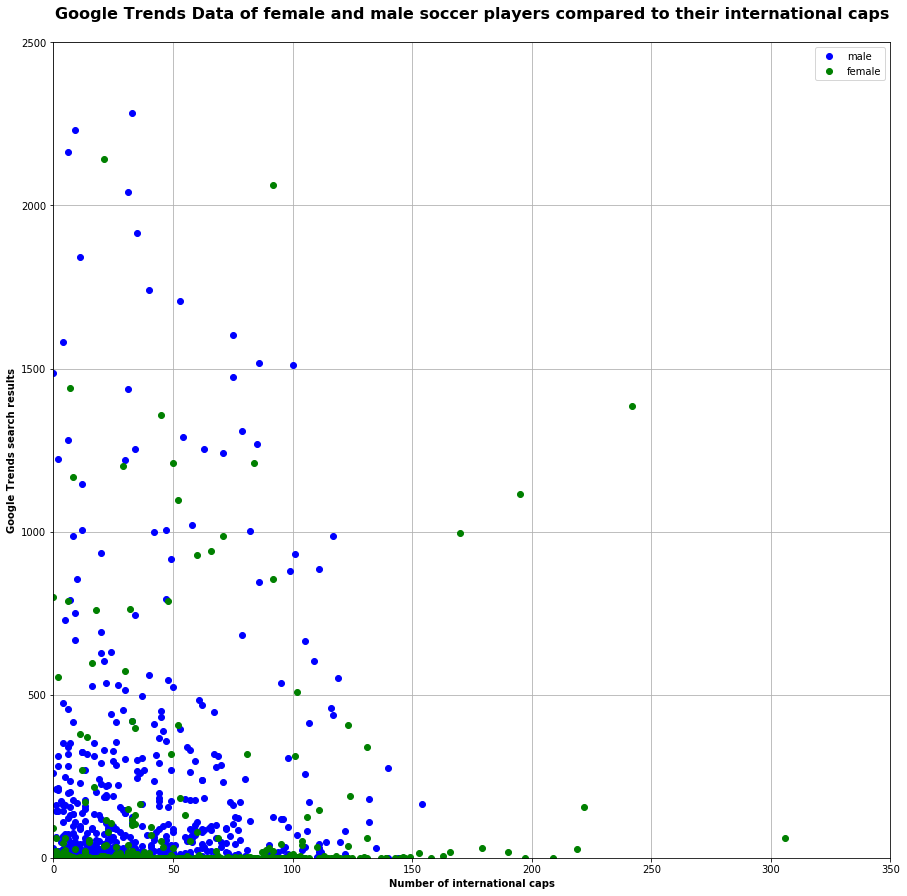

In [231]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import pandas as pd


df1 = pd.read_csv("wc_2014.csv", sep=';')
columns =['Matches']
df2 = pd.read_csv("Sum_Male_GoogleTrend.csv", sep=';')
columns2 = ['Sum GoogleTrends']
df3 = pd.read_csv("wc_2015.csv", sep=';')
columns3 =['Matches']
df4 = pd.read_csv("Sum_Female_GoogleTrend.csv", sep=';')
columns4 = ['Sum GoogleTrends']

# male
x = df1[columns]  #.sort_values(by='Matches')
y = df2[columns2]

# female
z = df3[columns3]  #.sort_values(by='Matches')
a = df4[columns4]


plt.figure(1, figsize=(15,15))
plt.axis([0, 350, 0, 2500])
plt.plot(x, y, 'bo', color='b', label='male')

plt.grid(True)

plt.plot(z, a, 'bo', color='g', label='female')
plt.axis([0, 350, 0, 2500])
plt.grid(True)

plt.xlabel('Number of international caps', fontweight='bold')
plt.ylabel('Google Trends search results', fontweight='bold')
plt.title('Google Trends Data of female and male soccer players compared to their international caps' + '\n', fontsize=16, fontweight='bold')
plt.legend(["male", "female"]);

#plt.show()
plt.savefig('Compare_GoogleTrends_female_male_caps.png')




<br>
### 3.3 Boxplot of male and female soccer players
<p style="font-size:12pt">The code creates a boxplot of the Google Trends data from female and male soccer players.<br></p> 

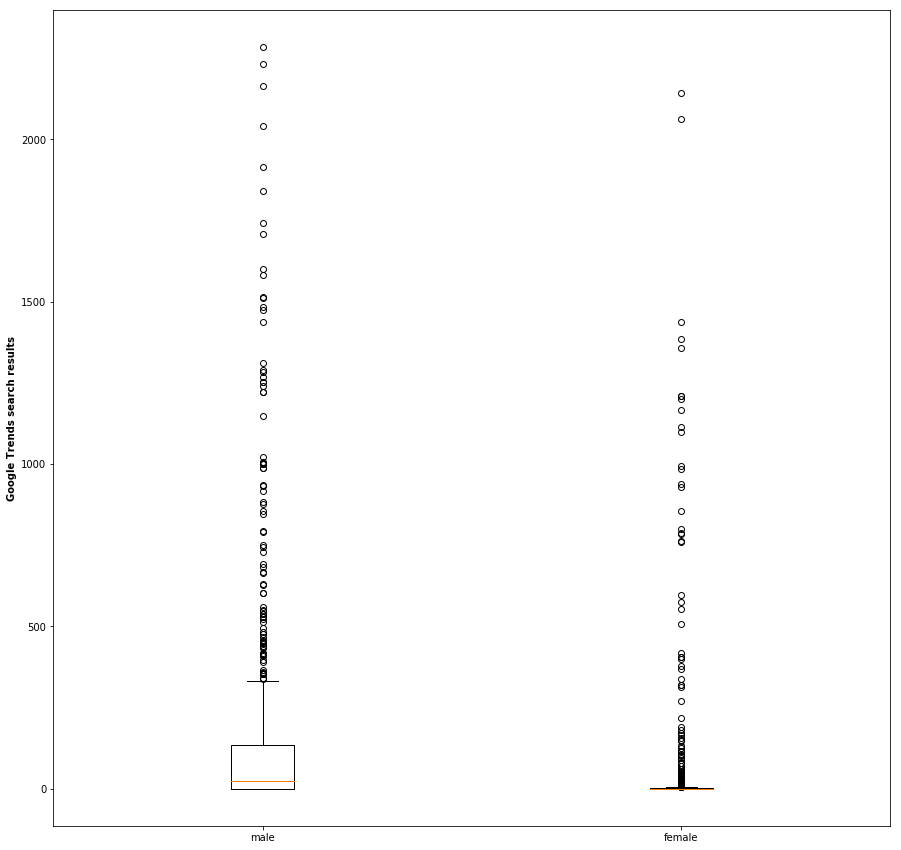

In [14]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import matplotlib.cbook as cbook
import pandas as pd

df2 = pd.read_csv("Sum_Male_GoogleTrend.csv", sep=';')
columns2 = 'Sum GoogleTrends'
df5 = pd.read_csv("Sum_Female_GoogleTrend.csv", sep=';')
columnsF = 'Sum GoogleTrends'

y = df2[columns2].values.tolist()
fem = df5[columnsF].values.tolist()
x =[y, fem]
#print(y)
plt.figure(figsize=(15,15))
plt.boxplot(x)
plt.ylabel('Google Trends search results', fontweight='bold')
plt.xticks([1, 2], ['male', 'female'])
#plt.boxplot(fem)
#plt.show()

# creates a .png of the boxplot
plt.savefig('Boxplot_Compare_GoogleTrends.png')

<br>
# Step 4 Repeat process with different keyword
### Step 4.1 Male soccer player (Google Trends data compared with number of international caps)
<p style="font-size:12pt">Many values from the Google Trends data were zero, thus the process will be repeated with a different reference word 'bonsai'. Python throws the error 'Google returned a response with code 429' which means, that there were too many requests. Possible solutions which can be found in the internet (use a time sleep, different IP addresses) did not fix the error. <br></p> 

In [15]:
dfM_P = pd.read_csv("wc_2014.csv", sep=';')
Male_P = ['Name']
dfM_P[Male_P]#.to_csv('malePlayers.csv')

pytrend = TrendReq()

fi = open('male_GoogleTr.csv','w')
fi.write('date,Name,Reference,isPartial\n')
fi.close()

for i in range(0,736):
    kw_list = [dfM_P['Name'][i], 'bonsai']
    pytrend.build_payload(kw_list, timeframe='today 1-m', geo='', gprop='')
    time.sleep(2)

# Interest Over Time
    pytrend.interest_over_time().to_csv('male_GoogleTr.csv',mode='a')   

ResponseError: The request failed: Google returned a response with code 429.

### Step 4.1 Sum of Google Trends data for each male soccer player as .csv-file

The created file contains of the summed up Google Trends data for each player.

In [ ]:
dfM_Google = pd.read_csv("male_GoogleTr.csv")

numberOfPlayers = 736

f = open('Sum_Male_Google.csv','w', encoding = 'utf8')
f.write('Name;Sum GoogleTrends\n')

for i in range(0,30*numberOfPlayers,30):
    sum = 0
    for j in range(i+1,i+28):
#        print(j)
        x = int(dfM_Google.iloc[j,1])
        sum += x
    f.write(str(dfM_Google.iloc[i,1]) + str(';') + str(sum) + '\n')
f.close()